
# Logistic Regression Tutorial with Wine Quality Dataset
### Written by: Hongyu Guo
### Date:  Oct. 31st, 2025
This notebook introduces **Logistic Regression**, explains the theory, and demonstrates its application on the **Wine Quality Dataset**.

## Contents
1. Introduction to Logistic Regression
2. Dataset Overview
3. Data Preparation
4. Model Training and evaluation with Logistic Regression
5. Feature Importance (Interpretation of Coefficients)
6. Conclusion



## 1. Introduction to Logistic Regression

Logistic regression is a supervised learning algorithm used for **classification tasks**.  
Unlike linear regression, which predicts continuous values, logistic regression models the **probability** of a binary outcome (0 or 1).

The model uses the **logistic (sigmoid)** function to map predictions between 0 and 1:

$$
P(y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n)}}
$$

Here:
- ( $P(y=1 \mid X) $) is the probability that the output belongs to class 1.  
- The coefficients $( \beta_i )$ represent the effect of each feature $( X_i )$ on the log-odds of the outcome.

Logistic regression is widely used in medicine, finance, and many other domains where the goal is to classify inputs into two categories.

---

In logistic regression, we model the probability that \( y = 1 \) given predictors \( X \) as:

$$
P(y=1 \mid X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad
\text{where } z = \beta_0 + \beta_1X_1 + \cdots + \beta_nX_n.
$$

The **odds** of success are defined as:

$$
\text{odds} = \frac{P(y=1 \mid X)}{1 - P(y=1 \mid X)}.
$$

Taking the natural logarithm of the odds gives the **log-odds** (or **logit**):

$$
\text{logit}(P(y=1 \mid X)) =
\ln\!\left(\frac{P(y=1 \mid X)}{1 - P(y=1 \mid X)}\right)
= z = \beta_0 + \beta_1X_1 + \cdots + \beta_nX_n.
$$

Thus, logistic regression is **linear in the log-odds**, even though it predicts probabilities in the range \((0,1)\).


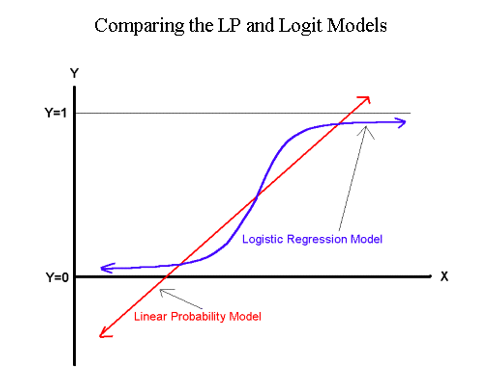

## Maximum Likelihood Estimation (MLE)

In logistic regression, we estimate the model parameters
$$
\boldsymbol{\beta} = (\beta_0, \beta_1, \dots, \beta_n)
$$
using **Maximum Likelihood Estimation (MLE)**.

The idea of MLE is to choose the parameters that **maximize the probability of observing the given data**.

---

### The Likelihood Function

For each observation $( i )$ with predictors $( X_i )$ and outcome $( y_i \in \{0, 1\} )$:

- The probability that \( y_i = 1 \) is:
  $$
  P(y_i = 1 \mid X_i) = \hat{p}_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_{i1} + \cdots + \beta_nX_{in})}}
  $$
- The probability that \( y_i = 0 \) is:
  $$
  P(y_i = 0 \mid X_i) = 1 - \hat{p}_i
  $$

Hence, for all $( m )$ observations, the **likelihood function** is:

$$
L(\boldsymbol{\beta})
= \prod_{i=1}^{m} [\hat{p}_i]^{y_i} [1 - \hat{p}_i]^{(1 - y_i)}
$$

---

### Log-Likelihood Function

Because products of many probabilities can be very small, we typically work with the **logarithm** of the likelihood function, called the **log-likelihood**:

$$
\ell(\boldsymbol{\beta})
= \sum_{i=1}^{m} \Big[
y_i \ln(\hat{p}_i) + (1 - y_i)\ln(1 - \hat{p}_i)
\Big]
$$

---

### Maximizing the Log-Likelihood

The goal of MLE is to find the parameters \( \boldsymbol{\beta} \) that maximize \( \ell(\boldsymbol{\beta}) \):

$$
\hat{\boldsymbol{\beta}}
= \arg\max_{\boldsymbol{\beta}} \; \ell(\boldsymbol{\beta})
$$

This optimization is usually performed using **numerical methods** such as **gradient ascent** or **Newton–Raphson**, since there is no closed-form analytical solution.

---

### Interpretation

- MLE finds the parameter values that make the observed outcomes most probable.  
- In logistic regression, it ensures that the predicted probabilities $( \hat{p}_i )$ best fit the actual outcomes $( y_i )$.  
- This method naturally leads to the familiar **cross-entropy loss** used in modern machine learning frameworks.

---

### Cross-Entropy Loss (Equivalent Form)

The **negative log-likelihood** (to be minimized) is:

$$
J(\boldsymbol{\beta})
= -\ell(\boldsymbol{\beta})
= -\sum_{i=1}^{m}
\Big[
y_i \ln(\hat{p}_i) + (1 - y_i)\ln(1 - \hat{p}_i)
\Big]
$$

This is the same as the **binary cross-entropy loss** used in neural networks and logistic regression models.


## 2. Dataset Overview

In [13]:

import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")

wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine_data.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


## 3. Data Preparation

In [14]:

from sklearn.model_selection import train_test_split

# Binary target: quality > 5 is good (1), otherwise bad (0)
wine_data['quality_binary'] = wine_data['quality'].apply(lambda x: 1 if x > 5 else 0)

X = wine_data.drop(['quality', 'quality_binary'], axis=1)
y = wine_data['quality_binary']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((1119, 11), (480, 11))

In [4]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1278,8.0,0.715,0.22,2.30,0.075,13.0,81.0,0.99688,3.24,0.54,9.5
489,9.3,0.390,0.40,2.60,0.073,10.0,26.0,0.99840,3.34,0.75,10.2
1186,6.6,0.800,0.03,7.80,0.079,6.0,12.0,0.99630,3.52,0.50,12.2
731,8.9,0.875,0.13,3.45,0.088,4.0,14.0,0.99940,3.44,0.52,11.5
843,7.1,0.685,0.35,2.00,0.088,9.0,92.0,0.99630,3.28,0.62,9.4


In [5]:
y_train.head()

,quality_binary
1278,1
489,1
1186,0
731,0
843,0


## 4. Model Training with Logistic Regression

In [17]:
# =====================================================
# Logistic Regression with Proper Normalization
# =====================================================
# We standardize the training data only,
# and then apply the same transformation to the test data.
# =====================================================

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------------------------------
# 1. Standardize the data
# -----------------------------------------------------
scaler = StandardScaler()

# Fit on training data only (learn mean and std)
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------------
# 2. Train the Logistic Regression model
# -----------------------------------------------------
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# -----------------------------------------------------
# 3. Make predictions on the test set
# -----------------------------------------------------
y_pred = log_reg.predict(X_test_scaled)

# -----------------------------------------------------
# 4. Evaluate model performance
# -----------------------------------------------------
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Logistic Regression Model Evaluation")
print(f"Accuracy: {acc:.4f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


✅ Logistic Regression Model Evaluation
Accuracy: 0.7333

Confusion Matrix:
 [[161  62]
 [ 66 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72       223
           1       0.75      0.74      0.75       257

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



### Note:
When we normalize (standardize) data, the scaling parameters (mean and standard deviation) must be computed only from the training set and then applied to the test set — to avoid data leakage.

## 5. Feature Importance (Interpretation of Coefficients)


In logistic regression, the relationship between predictors $( X_1, X_2, \dots, X_n )$
and the probability that the response $( y = 1 )$ is modeled as:

$$
\begin{aligned}
\text{logit}(P(y=1 \mid X))
&= \ln\!\left(\frac{P(y=1 \mid X)}{1 - P(y=1 \mid X)}\right) \\
&= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
\end{aligned}
$$

Here:
- $( \beta_0 )$ is the intercept term.  
- $( \beta_i )$ represents the effect of feature $( X_i )$ on the **log-odds** of the outcome.  

---

### Interpretation of Coefficients

Each coefficient $( \beta_i )$ measures how much the **log-odds** of $( y=1 )$ change
for a one-unit increase in $( X_i )$, holding all other variables constant.

$$
\Delta(\text{log-odds}) = \beta_i \cdot \Delta X_i
$$

A positive $( \beta_i )$ increases the log-odds (and probability) of $( y=1 )$,  
while a negative $( \beta_i )$ decreases it.

---

### Odds Ratio

By exponentiating the coefficient, we obtain the **odds ratio (OR)**:

$$
\text{Odds Ratio} = e^{\beta_i}
$$

This represents how the **odds** of $( y=1 )$ change for a one-unit increase in $( X_i )$:

$$
\text{Odds Ratio} =
\frac{\text{odds after a one-unit increase in } X_i}
{\text{original odds}}
$$

This represents how the odds of success ($y = 1$) change for a one-unit increase in the predictor $X_i$.

If $e^{\beta_i} > 1$: the feature increases the odds of $y = 1$ (positive effect).

If $e^{\beta_i} < 1$: the feature decreases the odds of $y = 1$ (negative effect).

If $e^{\beta_i} = 1$: the feature has no effect on the odds of $y = 1$.



---

### Example

If $( \beta_1 = 0.7 )$, then:

$$
e^{0.7} \approx 2.01
$$

This means that a one-unit increase in $( X_1 )$ **doubles** the odds of $( y=1 $).  

If $( \beta_2 = -0.7 $), then:

$$
e^{-0.7} \approx 0.50
$$

A one-unit increase in $( X_2 $) **halves** the odds of $( y=1 $).

---

### Summary

- The **sign** of $( \beta_i $) shows the direction of the effect.  
- The **magnitude** of $( |\beta_i| $) shows how strongly the feature influences the log-odds.  
- The **odds ratio $( e^{\beta_i} $)** expresses the multiplicative change in odds per unit increase in $( X_i $).  
- When comparing features, use **standardized coefficients** (after scaling) so that feature importance reflects true relative impact.


In [9]:
import matplotlib.pyplot as plt

coefs = log_reg.coef_[0]
features = X.columns

importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'AbsCoefficient': abs(coefs)
}).sort_values(by="AbsCoefficient", ascending=False)

importance


,Feature,Coefficient,AbsCoefficient
10,alcohol,0.850300,0.850300
1,volatile acidity,-0.562792,0.562792
6,total sulfur dioxide,-0.552516,0.552516
9,sulphates,0.487524,0.487524
0,fixed acidity,0.396030,0.396030
2,citric acid,-0.304049,0.304049
7,density,-0.210134,0.210134
5,free sulfur dioxide,0.184096,0.184096
4,chlorides,-0.151901,0.151901
3,residual sugar,0.109328,0.109328


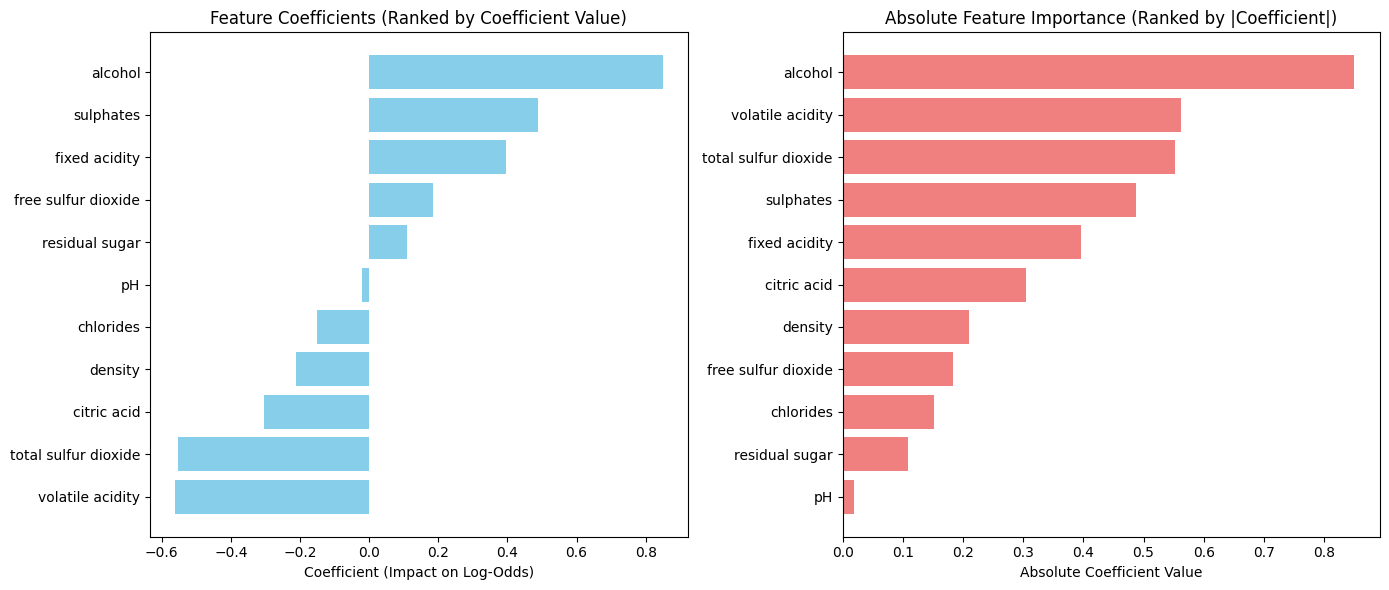

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

coefs = log_reg.coef_[0]
features = X.columns

# Create DataFrame
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'AbsCoefficient': abs(coefs)
})

# Sort for each plot separately
importance_coef = importance.sort_values(by="Coefficient", ascending=False)
importance_abs = importance.sort_values(by="AbsCoefficient", ascending=False)

# --- Side-by-side plots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Ranked by Coefficient (shows sign)
axes[0].barh(importance_coef['Feature'], importance_coef['Coefficient'], color='skyblue')
axes[0].set_title("Feature Coefficients (Ranked by Coefficient Value)")
axes[0].set_xlabel("Coefficient (Impact on Log-Odds)")
axes[0].invert_yaxis()

# Plot 2: Ranked by Absolute Coefficient
axes[1].barh(importance_abs['Feature'], importance_abs['AbsCoefficient'], color='lightcoral')
axes[1].set_title("Absolute Feature Importance (Ranked by |Coefficient|)")
axes[1].set_xlabel("Absolute Coefficient Value")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## Note:
if the features have different scales, you can’t directly compare coefficients to determine importance.

## 6. Regularization in Logistic Regression

Regularization helps prevent **overfitting** by adding a penalty to large coefficients.

### Regularized loss function:
$$
\text{Loss} = \text{Logistic Loss} + \lambda \times \text{Penalty Term}
$$

| Type | Penalty | Formula | Effect |
|------|----------|----------|--------|
| **L1 (Lasso)** | Absolute value | $\lambda \sum |\beta_i|$ | Shrinks some coefficients to 0 → *Feature selection* |
| **L2 (Ridge)** | Squared value | $\lambda \sum \beta_i^2$ | Shrinks all coefficients → *Smooth regularization* |

- **L1 regularization** → simpler, interpretable models with fewer active features.  
- **L2 regularization** → smooth shrinkage, better for correlated features.  
---
Let's apply these concepts using the **Wine Quality Dataset**.

In [20]:
# L1 regularized logistic regression (liblinear solver supports L1)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

logreg_l1.fit(X_train_scaled, y_train)
y_pred_l1 = logreg_l1.predict(X_test_scaled)

print("=== L1 Regularized Logistic Regression ===")
print(classification_report(y_test, y_pred_l1))

=== L1 Regularized Logistic Regression ===
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       223
           1       0.75      0.74      0.75       257

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



## 7. Adjusting Regularization Strength
- Use **C** (inverse of λ) to control penalty strength.  
- Always standardize data before regularization.

---
🎓 **Key Takeaway:**  
L1 helps select the most important features.  
L2 helps prevent overfitting by evenly distributing weights.


In [22]:
# Smaller C = stronger regularization
print("Effect of C (Inverse of Regularization Strength):")
from sklearn.preprocessing import StandardScaler

for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(penalty='l1', solver='liblinear', C=c, max_iter=1000)
    model.fit(StandardScaler().fit_transform(X_train_scaled), y_train)
    nonzero = (model.coef_ != 0).sum()
    print(f"C={c:<5} → Nonzero coefficients: {nonzero}")


Effect of C (Inverse of Regularization Strength):
C=0.01  → Nonzero coefficients: 4
C=0.1   → Nonzero coefficients: 9
C=1     → Nonzero coefficients: 11
C=10    → Nonzero coefficients: 11


## 8. Hyperparameter Tuning: `C` and `penalty`

In [24]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],       # Regularization types
    'C': [0.01, 0.1, 1, 10, 100]   # Regularization strength
}

# Initialize logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Display the best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.7480261050608584


### Logistic Regression Hyperparameter Tuning + Visualization

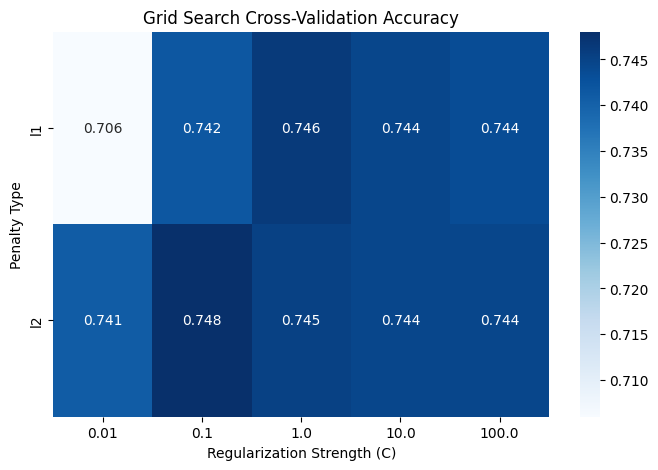

In [26]:
import seaborn as sns
# Convert results to DataFrame
results = pd.DataFrame(grid.cv_results_)

# Pivot results for heatmap (mean test accuracy)
pivot_table = results.pivot(index='param_penalty', columns='param_C', values='mean_test_score')

# Create heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".3f")
plt.title("Grid Search Cross-Validation Accuracy")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Penalty Type")
plt.show()


# Conclusion

- Logistic Regression is a **classification algorithm** that predicts probabilities using the logistic function.
- We trained it on the Wine Quality dataset, classifying wines as good (quality > 5) or bad.
- Feature importance showed which chemical properties most influence wine quality.
- Logistic regression is simple, interpretable, and effective for binary classification tasks.

- C controls regularization strength

Small C → strong regularization → simpler model

Large C → weaker regularization → more flexible model

- L1 vs L2 penalty

L1 (Lasso): Encourages sparsity → some coefficients become 0

L2 (Ridge): Shrinks coefficients smoothly toward 0

- **Feature importance** ranks how much each feature affects predictions, but does **not remove** features.

🎓 **Best Practice:**  
1. Use **L1** for automatic feature selection.  
2. Use **L2** for stability and smooth regularization.  
3. After selecting features, retrain the final model for interpretability.
